# Importing Libraries

In [42]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np
import scipy.cluster.hierarchy as sch # library for Dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
#importing warnings to ignore warningd
import warnings
warnings.filterwarnings

<function warnings.filterwarnings(action, message='', category=<class 'Warning'>, module='', lineno=0, append=False)>

In [43]:
#Load the dataset
airline=pd.read_excel('EastWestAirlines.xlsx')
airline

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


# EDA

In [44]:
#checking information about data
airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


SO there are No null values and the data type of each column is integer 

In [45]:
#Checking duplicated Rows
airline[airline.duplicated()].sum()

ID#                  0.0
Balance              0.0
Qual_miles           0.0
cc1_miles            0.0
cc2_miles            0.0
cc3_miles            0.0
Bonus_miles          0.0
Bonus_trans          0.0
Flight_miles_12mo    0.0
Flight_trans_12      0.0
Days_since_enroll    0.0
Award?               0.0
dtype: float64

We can see there are no duplicate values

In [46]:
#drop column which is not important
airline=airline.drop(['ID#'],axis=1)
airline

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [47]:
#Generate Descriptive Statistics
airline.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [48]:
airline.corr()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
Balance,1.000000,0.108722,0.338344,-0.008804,0.035243,0.403487,0.324935,0.217551,0.255700,0.263129,0.178494
Qual_miles,0.108722,1.000000,0.007931,-0.013923,-0.007779,0.031021,0.050725,0.126774,0.144004,0.017312,0.095256
cc1_miles,0.338344,0.007931,1.000000,-0.068223,0.060555,0.825200,0.608943,0.037370,0.041333,0.230849,0.335457
cc2_miles,-0.008804,-0.013923,-0.068223,1.000000,-0.006166,-0.003969,0.064399,0.010598,0.028284,-0.005807,0.005332
cc3_miles,0.035243,-0.007779,0.060555,-0.006166,1.000000,0.204134,0.097313,-0.001777,-0.001117,0.010832,0.023484
Bonus_miles,0.403487,0.031021,0.825200,-0.003969,0.204134,1.000000,0.603180,0.183536,0.185261,0.210397,0.373506
Bonus_trans,0.324935,0.050725,0.608943,0.064399,0.097313,0.603180,1.000000,0.377216,0.432364,0.161262,0.333893
Flight_miles_12mo,0.217551,0.126774,0.037370,0.010598,-0.001777,0.183536,0.377216,1.000000,0.869193,0.037271,0.217715
Flight_trans_12,0.255700,0.144004,0.041333,0.028284,-0.001117,0.185261,0.432364,0.869193,1.000000,0.059260,0.247909
Days_since_enroll,0.263129,0.017312,0.230849,-0.005807,0.010832,0.210397,0.161262,0.037271,0.059260,1.000000,0.188121


# Hierarchical Clustering

In [49]:
#Normalize the data using Normalization Function
from sklearn.preprocessing import normalize

In [50]:

air_norm=pd.DataFrame(normalize(airline),columns=airline.columns)

In [51]:
air_norm.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.970414,0.0,0.000034,0.000034,0.000034,0.006000,0.000034,0.000000,0.000000,0.241371,0.000000
1,0.940209,0.0,0.000049,0.000049,0.000049,0.010504,0.000098,0.000000,0.000000,0.340437,0.000000
2,0.981113,0.0,0.000024,0.000024,0.000024,0.097817,0.000095,0.000000,0.000000,0.166880,0.000000
3,0.904428,0.0,0.000061,0.000061,0.000061,0.030605,0.000061,0.000000,0.000000,0.425527,0.000000
4,0.912226,0.0,0.000037,0.000009,0.000009,0.404078,0.000243,0.019383,0.000037,0.064718,0.000009


We need to do scaling to reduce the dominance of some rows that leads to high values in Euclidian Distance.

In [52]:
#check shape of data
air_norm.shape

(3999, 11)

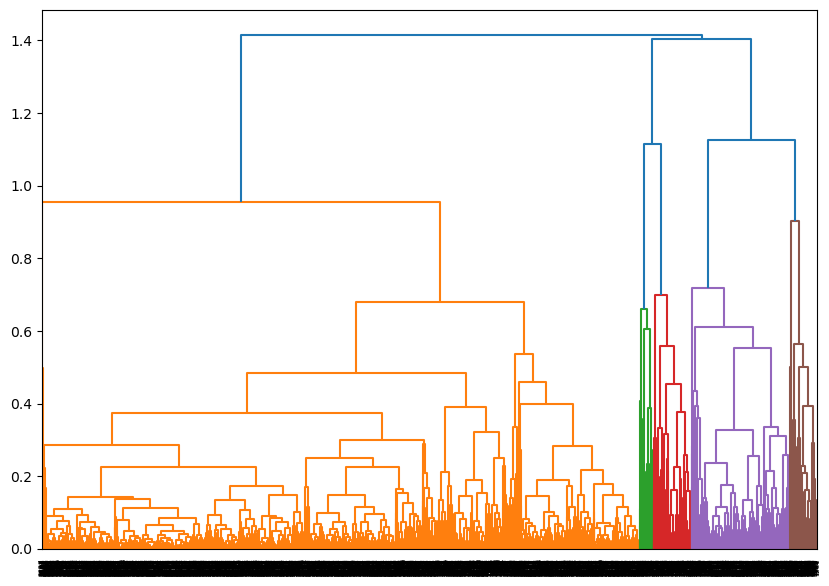

In [53]:
#Plot the hierarchical clustering as a dendrogram.
plt.figure(figsize=(10, 7))
Dendrogram=sch.dendrogram(sch.linkage(air_norm,method='complete'))

In [54]:
#perform Hierarchical clustering(Agglomerative)
hc=AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='average')
hc

AgglomerativeClustering(linkage='average', n_clusters=4)

In [55]:
y_hc=hc.fit_predict(air_norm)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [56]:
Clusters.value_counts()

Clusters
2           3651
0            203
3             87
1             58
dtype: int64

here we can see how many points are there in each clusters

In [57]:
#make dataframe and attached clusterId column
airline['h_ClusterId']=pd.DataFrame(y_hc,columns=['h_ClusterId'],)
airline

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_ClusterId
0,28143,0,1,1,1,174,1,0,0,7000,0,2
1,19244,0,1,1,1,215,2,0,0,6968,0,2
2,41354,0,1,1,1,4123,4,0,0,7034,0,2
3,14776,0,1,1,1,500,1,0,0,6952,0,2
4,97752,0,4,1,1,43300,26,2077,4,6935,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,2
3995,64385,0,1,1,1,981,5,0,0,1395,1,2
3996,73597,0,3,1,1,25447,8,0,0,1402,1,2
3997,54899,0,1,1,1,500,1,500,1,1401,0,2


In [58]:
#count of rows in each clusters
airline['h_ClusterId'].value_counts()

2    3651
0     203
3      87
1      58
Name: h_ClusterId, dtype: int64

In [59]:
# Apply Groupby on the dataframe and count mean
airline.groupby('h_ClusterId').agg(['mean']).reset_index()

,h_ClusterId,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,23503.399015,97.591133,3.502463,1.014778,1.088670,48137.300493,18.472906,770.669951,2.133005,4308.911330,1.000000
1,1,4931.310345,84.310345,1.189655,1.051724,1.000000,5033.017241,9.224138,793.172414,2.482759,4373.120690,0.637931
2,2,79175.229526,151.085456,2.018351,1.014243,1.008491,16013.185155,11.485620,447.798685,1.343194,4086.349493,0.336894
3,3,2364.827586,0.000000,1.000000,1.000000,1.000000,394.413793,2.034483,27.586207,0.137931,4856.402299,0.126437


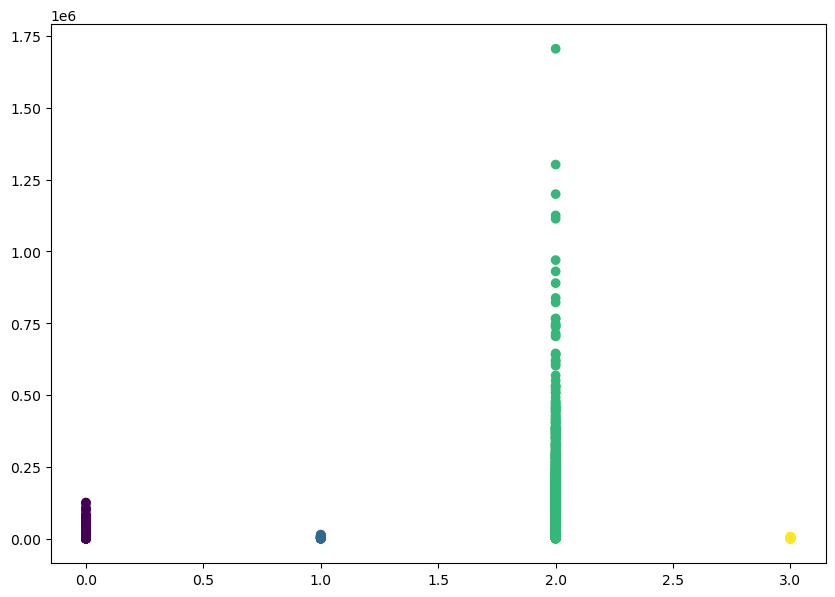

In [60]:
# Plot Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(airline['h_ClusterId'],airline['Balance'], c=y_hc) 

Conclusion:

In Hierarchical Clustering we have 4 clusters.

we made clusters of passengers that have similar characteristics for the purpose of targeting different segments for different types of mileage offers.

In 3rd cluster (clusterId=2) we have maximum number of passengers that have similar characteristics.

In 2nd and 4th clusters (clusterId=1 & clusterId=3) we have minimum number of passengers that have similar characteristics as compared to other clusters.

In [61]:
#checking silhouette score for Hierarchical Clustering
silhouette_score(air_norm,y_hc)

0.5734105132825342

# K-means Clustering 

In [62]:
#importing library for k-means
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [63]:
airline_k=air_norm
airline_k.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.970414,0.0,0.000034,0.000034,0.000034,0.006000,0.000034,0.000000,0.000000,0.241371,0.000000
1,0.940209,0.0,0.000049,0.000049,0.000049,0.010504,0.000098,0.000000,0.000000,0.340437,0.000000
2,0.981113,0.0,0.000024,0.000024,0.000024,0.097817,0.000095,0.000000,0.000000,0.166880,0.000000
3,0.904428,0.0,0.000061,0.000061,0.000061,0.030605,0.000061,0.000000,0.000000,0.425527,0.000000
4,0.912226,0.0,0.000037,0.000009,0.000009,0.404078,0.000243,0.019383,0.000037,0.064718,0.000009


In Hierarchical clustering we don't have any function to decide the best number of clusters

But, in K-Means clustering with the help of Elbow Method we can decide best number of clusters.

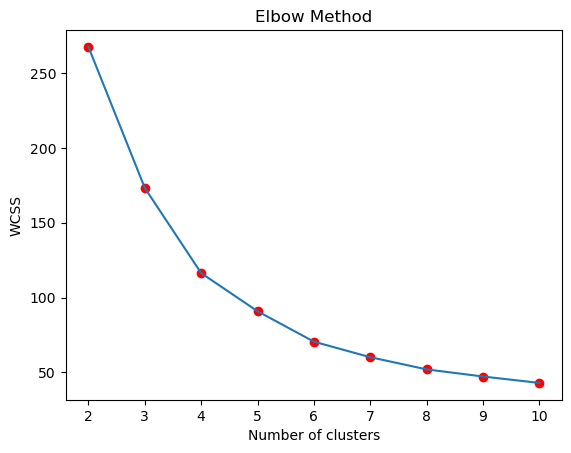

In [64]:
#perform KMeans clustering
#plot Elbow Chart to decide best number of clusters.
wcss=[]
for i in range(2,11):
    Kmeans=KMeans(n_clusters=i, random_state=42)
    Kmeans.fit(airline_k)
    wcss.append(Kmeans.inertia_)

plt.plot(range(2,11),wcss) 
plt.scatter(range(2,11), wcss, color = "red")
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


From Elbow method we can conclde that 5 number of clusters is best.

In [65]:
#within cluster sum of squared
wcss

[267.59741095991853,
 173.27025625511413,
 116.32481600680406,
 90.82398630372961,
 70.47296409901435,
 60.07965261338766,
 51.93503081743262,
 47.17230616681259,
 42.88480186853376]

In [69]:
# selecting 4 clusters from above elbow chart plot
Kmeans=KMeans(n_clusters=5)
Kmeans=Kmeans.fit_predict(airline_k)
Kmeans

array([0, 4, 0, ..., 2, 0, 4])

In [73]:
#make dataframe and attached clusterId column
airline['k_ClusterId']=pd.DataFrame(Kmeans,columns=['k_ClusterId'])
airline

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_ClusterId,k_ClusterId
0,28143,0,1,1,1,174,1,0,0,7000,0,2,0
1,19244,0,1,1,1,215,2,0,0,6968,0,2,4
2,41354,0,1,1,1,4123,4,0,0,7034,0,2,0
3,14776,0,1,1,1,500,1,0,0,6952,0,2,4
4,97752,0,4,1,1,43300,26,2077,4,6935,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,2,2
3995,64385,0,1,1,1,981,5,0,0,1395,1,2,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,2,2
3997,54899,0,1,1,1,500,1,500,1,1401,0,2,0


In [75]:
#count of rows in each cluster
airline['k_ClusterId'].value_counts()

0    2158
2     992
4     387
1     351
3     111
Name: k_ClusterId, dtype: int64

In [76]:
#apply Groupby on dataframe and count mean
airline.groupby('k_ClusterId').agg(['mean']).reset_index()

,k_ClusterId,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_ClusterId
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,97052.708990,187.518999,1.611214,1.009268,1.001854,9665.601946,9.722892,517.074143,1.555607,3956.474050,0.270158,2.000000
1,1,27462.797721,116.148148,3.245014,1.034188,1.071225,41806.162393,17.572650,670.883191,1.945869,4224.609687,0.903134,0.766382
2,2,71002.722782,110.376008,3.144153,1.026210,1.020161,32818.490927,17.717742,450.476815,1.330645,4057.118952,0.492944,1.995968
3,3,2415.576577,0.000000,1.009009,1.000000,1.000000,850.189189,3.036036,48.612613,0.171171,4723.225225,0.225225,2.576577
4,4,11756.307494,55.263566,1.005168,1.000000,1.000000,980.863049,3.444444,93.457364,0.294574,4910.258398,0.173127,1.989664


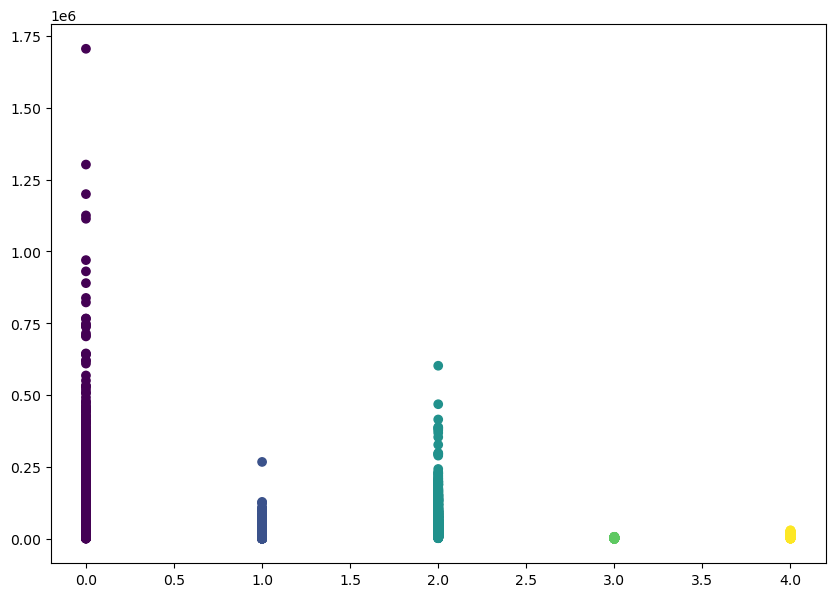

In [77]:
# Plot Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(airline['k_ClusterId'],airline['Balance'], c=Kmeans) 

Conclusion:

In KMeans we have 5 clusters.

we made clusters of passengers that have similar characteristics for the purpose of targeting different segments for different types of mileage offers.

In 1st cluster (clusterId=0) we have maximum number of passengers that have similar caharecteristics.

In 3rd and 5th clusters (clusterId=2 & clusterId=4) we have minimum number of passengers that have similar characteristics as compared to other clusters.

In [81]:
#checking silhouette score for Hierarchical Clustering
silhouette_score(air_norm,Kmeans)

0.8610168502902338

# DBSCAN

In [82]:
#import library for DBSCAN
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

In [84]:
#load the dataset
airline_d=pd.read_excel('EastWestAirlines.xlsx')
airline_d

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [85]:
airline_d=airline_d.drop(['ID#'],axis=1)
airline_d

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


<AxesSubplot:>

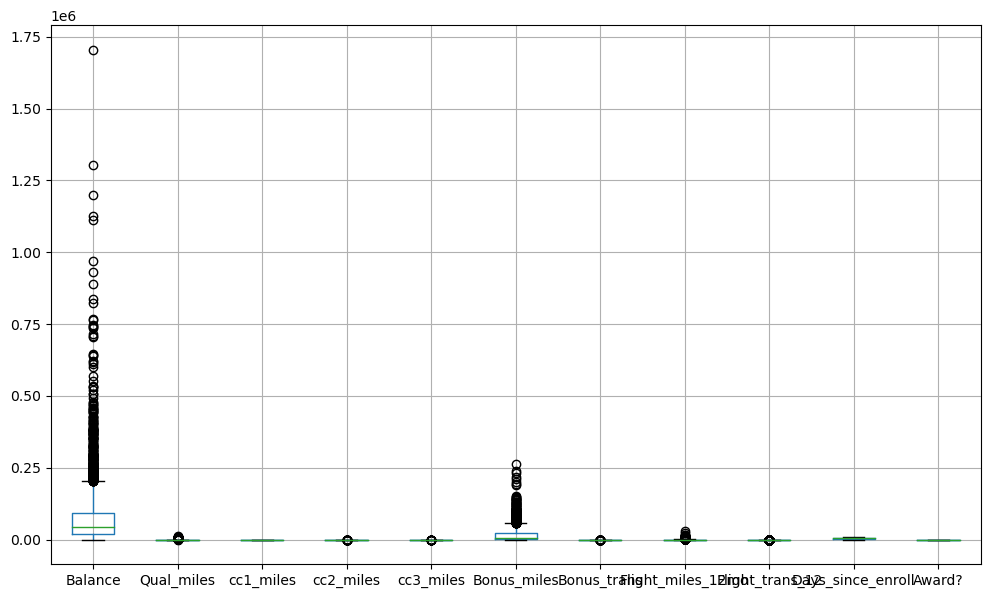

In [86]:
#make a boxplot to check noisy points (outliers)
airline_d.boxplot(figsize=(12,7))

In [87]:
airline_d.columns

Index(['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

In [89]:
#convert into arrays.(.values)
array=airline_d.values
array

array([[28143,     0,     1, ...,     0,  7000,     0],
       [19244,     0,     1, ...,     0,  6968,     0],
       [41354,     0,     1, ...,     0,  7034,     0],
       ...,
       [73597,     0,     3, ...,     0,  1402,     1],
       [54899,     0,     1, ...,     1,  1401,     0],
       [ 3016,     0,     1, ...,     0,  1398,     0]], dtype=int64)

In [91]:
#Normalize the data using Normalization Function- Standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(array)
X = scaler.transform(array)

In [92]:
#perform DBSCAN clustering
dbscan = DBSCAN(eps=3, min_samples=25)
dbscan.fit(X)

DBSCAN(eps=3, min_samples=25)

In [93]:
dbscan.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [94]:
airline_d['d_ClusterId']=pd.DataFrame(dbscan.labels_,columns=['d_ClusterId'])
airline_d

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,d_ClusterId
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,54899,0,1,1,1,500,1,500,1,1401,0,0


In [95]:
#apply Groupby on the dataframe and count mean
airline_d.groupby('d_ClusterId').agg(['mean']).reset_index()

,d_ClusterId,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,-1,208994.778481,1651.753165,2.303797,1.367089,1.310127,44638.310127,23.968354,3337.905063,9.354430,4643.151899,0.664557
1,0,68031.901588,82.097631,2.049466,1.000000,1.000000,16013.899245,11.093205,341.675085,1.045301,4096.980213,0.358240


In [96]:
#count of rows in each cluster
airline_d['d_ClusterId'].value_counts()

 0    3841
-1     158
Name: d_ClusterId, dtype: int64

<AxesSubplot:>

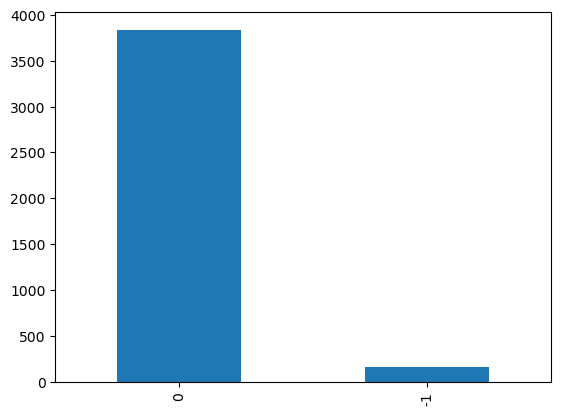

In [97]:
#Barplot of clusterId
airline_d["d_ClusterId"].value_counts().plot.bar()

Conclusion:

In DBSCAN we have 2 clusters.

clusterId=-1 has noisy records (outliers).

In [98]:
#Checking silhouette score
silhouette_score(array,dbscan.labels_)

0.5768112141322941

A Silhouette score ranges from -1 to 1.
With -1 being the worst score possible and 1 being the best sore.
Silhouette score of 0 suggest overlaping of clusters.